<a href="https://colab.research.google.com/github/RamKaushal/Machine-Learning-algos-using-Pandas-And-Sklearn/blob/main/Logistic_regression_using_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
data = pd.read_csv("/content/haberman.csv.data")

In [15]:
data.sample(5)

,30,64,1,1.1
210,58,67,0,1
40,40,58,0,1
118,49,60,1,1
192,56,66,2,1
257,65,58,0,2


In [16]:
data.columns = ['Age','operation Year','Lymph nodes','Survival status']

In [17]:
data.sample(5)

,Age,operation Year,Lymph nodes,Survival status
92,46,62,0,1
136,51,59,3,2
113,49,63,0,2
135,51,59,13,2
222,60,59,17,2


In [18]:
data.head()

,Age,operation Year,Lymph nodes,Survival status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [20]:
import seaborn as sns

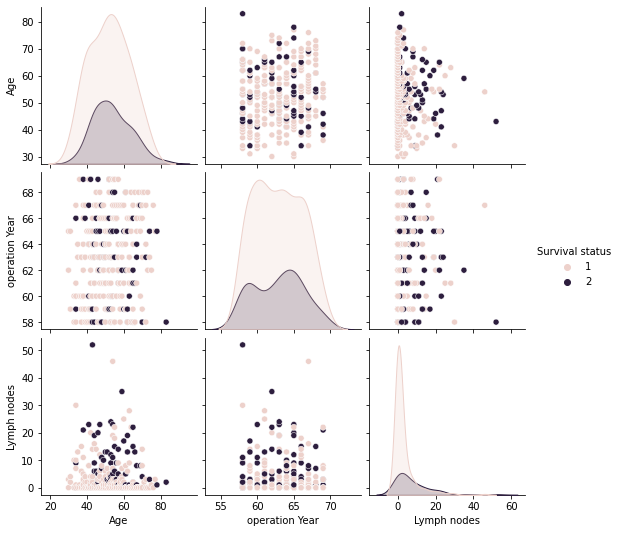

In [23]:
sns.pairplot(data=data,hue='Survival status')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fac09a9bba8>,
      dtype=object)

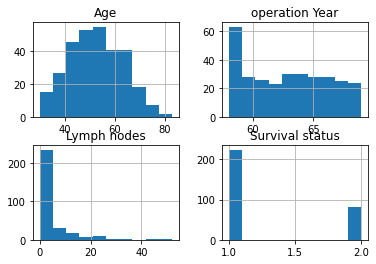

In [24]:
data.hist()

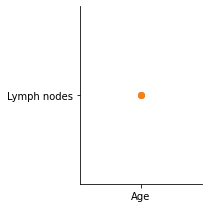

In [25]:
sns.FacetGrid(data=data,hue='Survival status').map(plt.scatter,x='Age',y='Lymph nodes')

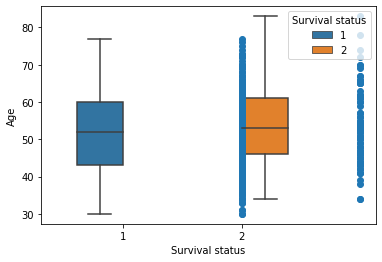

In [31]:
sns.boxplot(data=data,hue='Survival status',x='Survival status',y='Age')
plt.scatter( x=data['Survival status'],y=data['Age'] )

In [32]:
data.corr()

,Age,operation Year,Lymph nodes,Survival status
Age,1.000000,0.092623,-0.066548,0.064351
operation Year,0.092623,1.000000,-0.003277,-0.004076
Lymph nodes,-0.066548,-0.003277,1.000000,0.286191
Survival status,0.064351,-0.004076,0.286191,1.000000


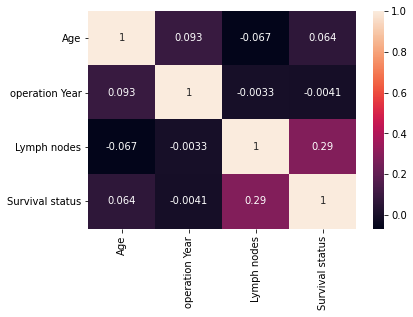

In [33]:
sns.heatmap(data.corr(),annot=True)

In [34]:
data.isnull().sum()

Age                0
operation Year     0
Lymph nodes        0
Survival status    0
dtype: int64

In [35]:
data.drop_duplicates(inplace=True)

In [36]:
data.shape

(288, 4)

In [51]:
x = data.iloc[:,:-1]
y = data.iloc[:,3]

In [52]:
y

0      1
1      1
2      1
3      1
4      1
      ..
300    1
301    1
302    1
303    2
304    2
Name: Survival status, Length: 288, dtype: int64

In [57]:
y = np.array(y)
x = np.array(x)

In [58]:
y.reshape(-1,1)

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [2],
       [2],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [2],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [2],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [2],
       [2],
       [2],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [2],
       [2],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [2],
       [2],
       [2],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [2],
       [2],
       [2],
       [1],
       [1],
       [1],
       [2],
       [2],
       [2],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [53]:
from sklearn.model_selection import train_test_split


In [59]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [61]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [64]:
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [65]:
y_pred = lr.predict(x_test)

In [66]:
from sklearn.metrics import *

In [67]:
confusion_matrix(y_test,y_pred)

array([[64,  3],
       [17,  3]])

In [69]:
count = 0
for i in data['Survival status']:
  if i ==1:
    count +=1

In [70]:
count

209

In [71]:
recall_score(y_test,y_pred)

0.9552238805970149

In [73]:
precision_score(y_test,y_pred)

0.7901234567901234

In [76]:
data['Survival status'].values

array([1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1,
       1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1,
       1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1,
       1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       2, 2])